# Naive Bayes

## Preliminary
The _Naive Bayes_ classifier is often used when it comes to the classification of textual data but can also be used for any other classification task. The underlying math comes from the _Bayes theorem_ which describes the probability of an event based on a _prior_. This prior represents the knowledge of different conditions and thus often allows for a more accurate prediction.  
As the task of this exercise is to use the naive bayes approach to classify text data, we will first take a quick look/recap at useful preprocessing techniques for _natural language processing_(NLP) as you will need these to solve the task at hand.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Remove punctuation
#### List comprehension
There are different techniques to remove punctuation from our data. The first uses the _string_ library and a list comprehension.

In [2]:
import string

print(string.punctuation)

s = ("This is a test text to show off some of the relevant preprocessing techniques for NLP problems. These include the removal of punctuation, the conversion to lower case as well as the removal of stopwords.")

s_wo_punct = [c for c in s if c not in string.punctuation]
s_wo_punct

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['T',
 'h',
 'i',
 's',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 't',
 'e',
 's',
 't',
 ' ',
 't',
 'e',
 'x',
 't',
 ' ',
 't',
 'o',
 ' ',
 's',
 'h',
 'o',
 'w',
 ' ',
 'o',
 'f',
 'f',
 ' ',
 's',
 'o',
 'm',
 'e',
 ' ',
 'o',
 'f',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'r',
 'e',
 'l',
 'e',
 'v',
 'a',
 'n',
 't',
 ' ',
 'p',
 'r',
 'e',
 'p',
 'r',
 'o',
 'c',
 'e',
 's',
 's',
 'i',
 'n',
 'g',
 ' ',
 't',
 'e',
 'c',
 'h',
 'n',
 'i',
 'q',
 'u',
 'e',
 's',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 'N',
 'L',
 'P',
 ' ',
 'p',
 'r',
 'o',
 'b',
 'l',
 'e',
 'm',
 's',
 ' ',
 'T',
 'h',
 'e',
 's',
 'e',
 ' ',
 'i',
 'n',
 'c',
 'l',
 'u',
 'd',
 'e',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'r',
 'e',
 'm',
 'o',
 'v',
 'a',
 'l',
 ' ',
 'o',
 'f',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'c',
 'o',
 'n',
 'v',
 'e',
 'r',
 's',
 'i',
 'o',
 'n',
 ' ',
 't',
 'o',
 ' ',
 'l',
 'o',
 'w',
 'e',
 'r',
 ' ',
 'c',
 'a',
 's',
 'e',
 ' ',
 'a',
 's'

In [3]:
s_wo_punct = "".join(s_wo_punct)
s_wo_punct

'This is a test text to show off some of the relevant preprocessing techniques for NLP problems These include the removal of punctuation the conversion to lower case as well as the removal of stopwords'

#### Regular expression
The second approach uses _regular expressions_ to find specific characters and then substitute those characters with an empty char. You are not limited to use string.punctuation but can define any char you want to be deleted from the string (see commented line in the code below).

In [4]:
import re

s_wo_punct2 = re.sub("[.,!?:;-='...\"@#_]", "", s)
s_wo_punct3 = re.sub(f"[{string.punctuation}]", "", s)

print(s_wo_punct2)
print(s_wo_punct3)

This is a test text to show off some of the relevant preprocessing techniques for NLP problems These include the removal of punctuation the conversion to lower case as well as the removal of stopwords
This is a test text to show off some of the relevant preprocessing techniques for NLP problems These include the removal of punctuation the conversion to lower case as well as the removal of stopwords


### Lower case
Transform the text to lowercase.

In [5]:
s_wo_punct_lower = s_wo_punct.lower()
s_wo_punct_lower

'this is a test text to show off some of the relevant preprocessing techniques for nlp problems these include the removal of punctuation the conversion to lower case as well as the removal of stopwords'

### Remove stopwords
As text classification does not usually rely on a deep understanding of the underlying text, the added value of pronouns, articles and prepositions oftentimes diminishes for these kind of tasks. They are thus entirely removed from the text corpus to reduce the dimensionality of the input data.  
We use the python NLP package __NLTK__ which requires you to download the stopwords if you use it for the first time. Subsequent usage of the package will not require you to refetch these files every time. The stopwords are designed for different languages as can be seen in the code below.

In [6]:
# You have to download stopwords Package to execute this command
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

print(stopwords.words('german'))
print(stopwords.words('english'))

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc

[nltk_data] Downloading package stopwords to /home/dan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
s_wo_punct_lower_nosw = " ".join([w for w in s_wo_punct_lower.split() if w not in stopwords.words("english")])

s_wo_punct_lower_nosw

'test text show relevant preprocessing techniques nlp problems include removal punctuation conversion lower case well removal stopwords'

### Count Vectorizer
A _Count Vectorizer_ is used to generate a representation of the underlying text in terms of the frequency of all words in the corpus. These features (__X__ in this case) can then be used to train a classifier.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ['This is the fourth exercise.','This exercise is not online yet','Exercise four is boring, I want another exercise','Is this the first exercise?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

print(vectorizer.get_feature_names_out())

['another' 'boring' 'exercise' 'first' 'four' 'fourth' 'is' 'not' 'online'
 'the' 'this' 'want' 'yet']


Here the transformed input gets stored into a dataframe. _X_ could also directly be used for training purposes (via model.fit(X)).

In [9]:
print(X.toarray())

df2 = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df2

[[0 0 1 0 0 1 1 0 0 1 1 0 0]
 [0 0 1 0 0 0 1 1 1 0 1 0 1]
 [1 1 2 0 1 0 1 0 0 0 0 1 0]
 [0 0 1 1 0 0 1 0 0 1 1 0 0]]


,another,boring,exercise,first,four,fourth,is,not,online,the,this,want,yet
0,0,0,1,0,0,1,1,0,0,1,1,0,0
1,0,0,1,0,0,0,1,1,1,0,1,0,1
2,1,1,2,0,1,0,1,0,0,0,0,1,0
3,0,0,1,1,0,0,1,0,0,1,1,0,0


### Naive Bayes classifier
In order to use the classifier you first need to import it. There are three different variants preimplemented by sklearn, namely the _MultinomialNB_ which is used for the classification of text data, the _CategoricalNB_ which handles categorical data and the _GaussianNB_ for continuous features. In this exercise you will get to apply the two former types.

In [10]:
from sklearn.naive_bayes import MultinomialNB, CategoricalNB

naive_bayes = MultinomialNB()

naive_bayes.fit(X,[0,0,0,1])

MultinomialNB()

## Task 2
As written in the accompanying PDF, please download the "emails" dataset from __[here](https://github.com/DataScienceLabFHSWF/machine-learning-book/tree/main/data/naive_bayes)__ and load it into a pandas Dataframe. Get familiar with the dataset. 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("emails.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


### Visualization
Visualize different aspects of the dataset (e.g. class distribution, text length of the different entries) by using matplotlib or seaborn. The text length of each sample should be stored in an extra column called _length_.

Get length for each text sample and store them in column _length_ of the dataframe.

In [12]:
df["length"] = df["text"].apply(len)
df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
 2   length  5728 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 134.4+ KB


Plot the distribution of lengths for _spam_ and _non-spam_ samples.

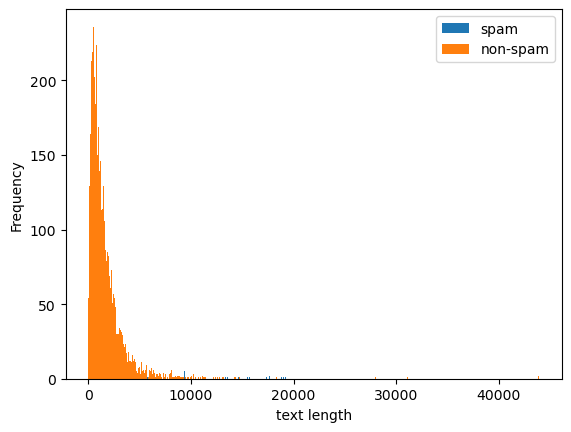

In [14]:
df["length"][df["spam"]==1].plot(bins=500, kind="hist", label="spam")
df["length"][df["spam"]==0].plot(bins=500, kind="hist", label="non-spam")
plt.xlabel("text length")
plt.ylabel("Frequency")
plt.legend(loc="best")
plt.show()

Display the shortest (and longest) message that are stored in this dataframe.

In [15]:
df["length"].describe().max()

43952.0

Display the shortest (and longest) message that are stored in this dataframe.

In [16]:
shortest_msg = df[df["length"] == df["length"].describe().min()]["text"].iloc[0]
longest_msg = df[df["length"] == df["length"].describe().max()]["text"].iloc[0]

print(shortest_msg)
print(longest_msg)

Subject: fyi 
Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under ' protest ' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010

Visualize the most frequent words (for spam and non-spam texts) with the help of the package _wordcloud_. Do you notice any meaningful differences between these two wordclouds? What is the problem with some of the frequent words (for both cases) and how would you rate the added value of these problematic words when it comes to actually training a classifier?

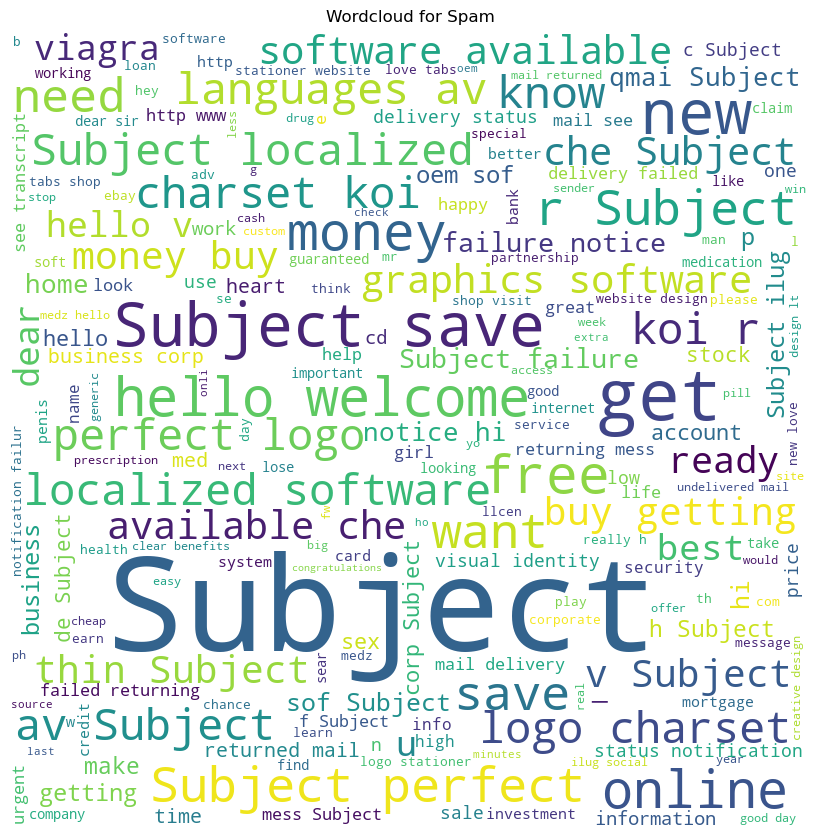

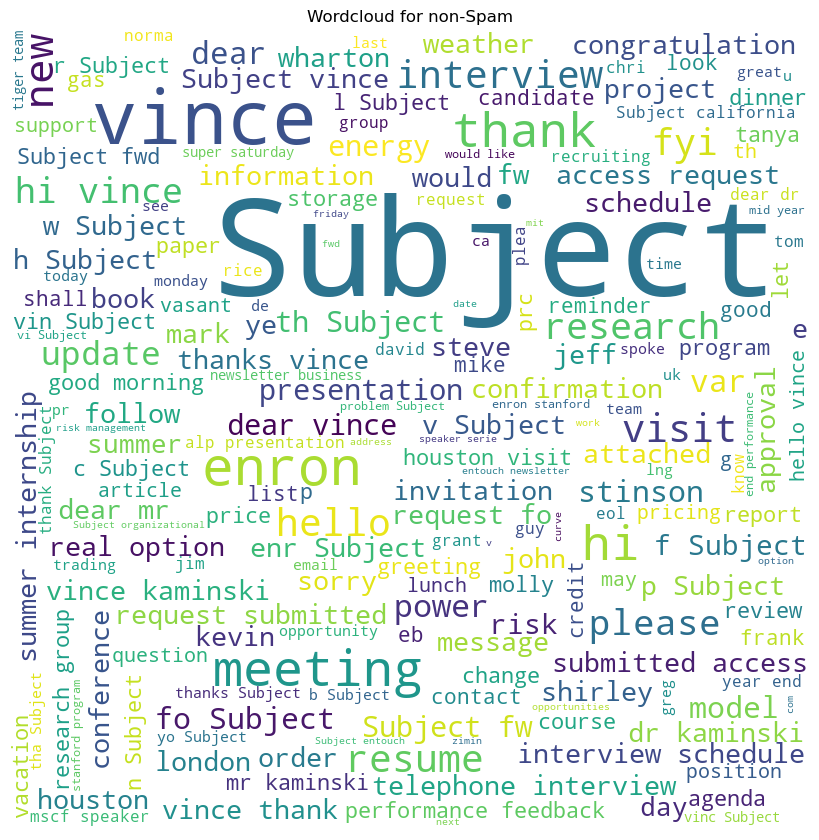

In [17]:
from wordcloud import WordCloud

wordcloud_spam_noncleaned = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(df["text"][df["spam"] == 1].to_string())

wordcloud_nonspam_noncleaned = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(df["text"][df["spam"] == 0].to_string())
                  
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_spam_noncleaned)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Wordcloud for Spam")
plt.show()
                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_nonspam_noncleaned)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Wordcloud for non-Spam")
plt.show()

Calculate the class distribution between spam and non-spam data in percent and then use a barplot (or countplot if you use seaborn) to present it visually.

Non-Spam percentage: 76.11731843575419 %
Spam percentage: 23.88268156424581 %


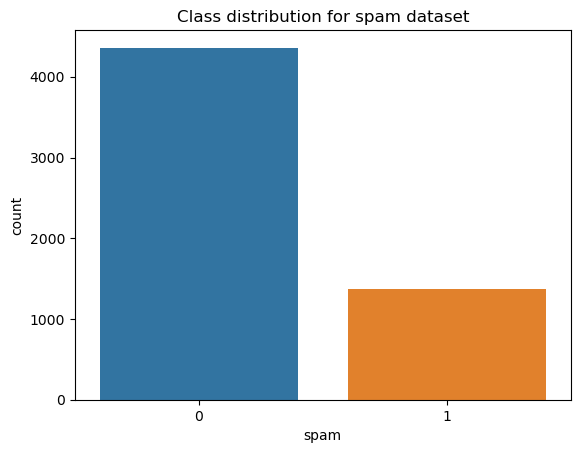

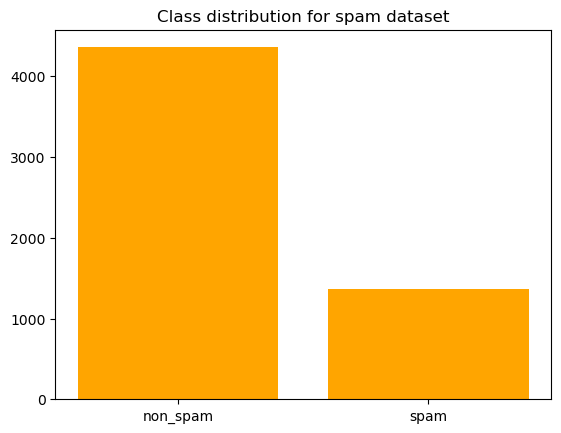

In [18]:
non_spam = df[df["spam"]==0]
spam = df[df["spam"]==1]
len(spam)

print("Non-Spam percentage: {} %".format(len(non_spam)/len(df)*100))
print("Spam percentage: {} %".format(len(spam)/len(df)*100))
# len(non_spam)

sns.countplot(x=df["spam"], label = "Count")
plt.title("Class distribution for spam dataset")
plt.show()

data = {"non_spam":len(non_spam), "spam": len(spam)}
plt.bar(["non_spam","spam"],[len(non_spam),len(spam)], color="orange")
plt.title("Class distribution for spam dataset")
plt.show()

# list(data.keys())
# list(data.values())
# ["non_spam","spam"]

### Preprocess dataset
Define your functions for text cleaning here and then preprocess the text. 

In [19]:
def remove_punctuation(text):
    return re.sub(f"[{string.punctuation}]", "", text)

def text_to_lower(text):
    return text.lower()
    
def remove_stopwords(text):
    s = [w for w in text.split() if w not in stopwords.words("english")]
    return " ".join(s)

def preprocess_text(text):
    text = remove_punctuation(text)
    text = text_to_lower(text)
    text = remove_stopwords(text)
    return text


In [20]:
df_cleaned = df
df_cleaned = df_cleaned["text"].apply(preprocess_text)

df_cleaned.head()

0    subject naturally irresistible corporate ident...
1    subject stock trading gunslinger fanny merrill...
2    subject unbelievable new homes made easy im wa...
3    subject 4 color printing special request addit...
4    subject money get software cds software compat...
Name: text, dtype: object

Now that we have cleaned our sample texts we can use the dataset to perform the training and test procedure. Use the _CountVectorizer_ to generate the features. 

In [21]:
df_cleaned


0       subject naturally irresistible corporate ident...
1       subject stock trading gunslinger fanny merrill...
2       subject unbelievable new homes made easy im wa...
3       subject 4 color printing special request addit...
4       subject money get software cds software compat...
                              ...                        
5723    subject research development charges gpg forwa...
5724    subject receipts visit jim thanks invitation v...
5725    subject enron case study update wow day super ...
5726    subject interest david please call shirley cre...
5727    subject news aurora 5 2 update aurora version ...
Name: text, Length: 5728, dtype: object

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
# train_img, test_img, train_lbl, test_lbl = train_test_split(
#     mnist.data, mnist.target, test_size=1/7.0, random_state=0)
# Define the cleaning pipeline we defined earlieranalyzer = message_cleaning
vectorizer = CountVectorizer()

x_train,x_test,y_train,y_test = train_test_split(df_cleaned,df["spam"],test_size=0.25,random_state=0)

x_train_vector = vectorizer.fit_transform(x_train)
x_test_vector = vectorizer.transform(x_test)

print(f"x_train_vector.shape: {x_train_vector.shape}  |  x_test_vector.shape: {x_test_vector.shape}")
print(x_train_vector.toarray())

x_train_vector.shape: (4296, 32621)  |  x_test_vector.shape: (1432, 32621)
[[0 0 0 ... 0 0 0]
 [2 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


### Training
As we are dealing with features generated from text data, we use the _sklearn.naive_bayes.MultinomialNB_ as our underlying model.

In [23]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_vector,y_train)

MultinomialNB()

Performance on test dataset:

In [24]:
naive_bayes.score(x_test_vector,y_test)

0.9902234636871509

Performance on own text samples:

In [25]:
test_samples = ["Hey, please let me know if you need any further help. I will look into it as soon as possible!",
                "Free money! Join today and you will never have to worry about your financial situation again.",
                "Use viagra and the fun never stops!", "Hey bro, can you borrow me some cash? I'm pretty broke."]
test_labels = [0,1,1,0]

own_test_samples_vector = vectorizer.transform(test_samples)

naive_bayes.predict(own_test_samples_vector)
naive_bayes.predict_proba(own_test_samples_vector)

array([[9.98133499e-01, 1.86650057e-03],
       [1.27114452e-03, 9.98728855e-01],
       [4.40340383e-05, 9.99955966e-01],
       [6.88926468e-03, 9.93110735e-01]])

In [26]:
test_res = naive_bayes.predict(x_test_vector)

wrong_classifications = []

for k,res in enumerate(test_res):
    if res != list(y_test)[k]:
        wrong_classifications.append(list(x_test)[0])

list(y_test)
list(x_test)

wrong_classifications[0]

'subject comments fyi forwarded rakesh bharati na enron 03 27 2001 07 43 pm sheridan titman 03 27 2001 06 46 31 pm rakesh bharati enron com cc subject comments rakesh thanks input quite useful helping clarify thinking following responses comments clarifications ed paragraphs others 1 money set aside avoid negative values clear mean values cash flow pv node anyhow shall setting aside money specific node nodes cross section time risk free asset pays states nature done every time negative realization thus typical project value risk capital may extremely high following tail based norm anymore agree confusing needs refinement concerns discounting negative cash flows discussed first memo clearly provides conservative estimate firm value measure risk capital high perspective evaluating appropriate level risk capital sufficient enough capital employed pv node positive also one might want set level pv positive say 98 nodes 2 memo appears suggest debt capacity contingent values positive issuing 

### Evaluation

<AxesSubplot:>

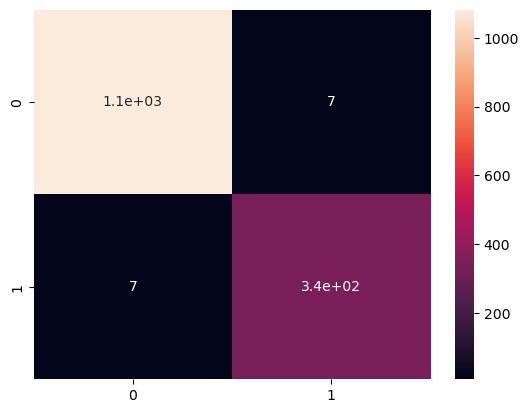

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

preds = naive_bayes.predict(x_test_vector)

conf_mat = confusion_matrix(y_test,preds)

sns.heatmap(conf_mat, annot=True)

In [28]:
class_rep = classification_report(y_test,preds)
print(class_rep)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1089
           1       0.98      0.98      0.98       343

    accuracy                           0.99      1432
   macro avg       0.99      0.99      0.99      1432
weighted avg       0.99      0.99      0.99      1432



## Task 3
In this task we will analyze the flu dataset which can be downloaded __[here](http://url)__. It is a very small toy dataset to showcase the encoding of categorical features as well as the usage of another variant of the Naive Bayes classifier.

### Preprocessing
Get familiar with the dataset. The goal is to predict whether or not a person has the flu.  
What are the feature columns and what is the target column in this example?

In [1]:
from sklearn import preprocessing
import pandas as pd

df = pd.read_csv("flu.csv")
df.head()
df

,Chills,runny nose,head ache,fever,Flu
0,Y,N,Mild,Y,N
1,Y,Y,No,N,Y
2,Y,N,Strong,Y,Y
3,N,Y,Mild,Y,Y
4,N,N,No,N,N
5,N,Y,Strong,Y,Y
6,N,Y,Strong,N,N
7,Y,Y,Mild,Y,Y


Use the LabelEncoder (sklearn.preprocessing.LabelEncoder()) to encode the data in the columns.

In [2]:
label_enc = preprocessing.LabelEncoder()
f1 = label_enc.fit_transform(df["Chills"].to_list())
f2 = label_enc.fit_transform(df["runny nose"].to_list())
f3 = label_enc.fit_transform(df["head ache"].to_list())
f4 = label_enc.fit_transform(df["fever"].to_list())
y = label_enc.fit_transform(df["Flu"].to_list())

# .apply(fit_transform)

Now use the encoded features (f1 to f4) to build a new dataframe for the training of our classifier, the _zip()_ function might be useful here.

In [3]:
X = pd.DataFrame(zip(f1,f2,f3,f4))
X

,0,1,2,3
0,1,0,0,1
1,1,1,1,0
2,1,0,2,1
3,0,1,0,1
4,0,0,1,0
5,0,1,2,1
6,0,1,2,0
7,1,1,0,1


### Training
We do not use the _MultinomialNB_ but instead _sklearn.naive_bayes.CategoricalNB_ as we have to deal with categorical data here.

In [34]:
from sklearn.naive_bayes import CategoricalNB

naive_bayes = CategoricalNB()
naive_bayes.fit(X,y)

CategoricalNB()

Generate a few input samples to feed into the classifier and print the predictions as well as the predicted probabilities for each target class (_model.predict_proba()_).

In [37]:
samples = [[1,1,1,1],[0,1,0,1],[1,0,0,0]]

print(naive_bayes.predict(samples))
print(naive_bayes.predict_proba(samples))

[1 1 0]
[[0.14938211 0.85061789]
 [0.18972879 0.81027121]
 [0.62212817 0.37787183]]
